https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset

### Dataset Description
The dataset includes patient profiles with features based on demographics, lifestyle habits, family history, and clinical measurements that are well-established indicators of diabetes risk. All data is generated using statistical distributions inspired by real-world medical research, ensuring privacy preservation while reflecting realistic health patterns.

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from scipy.stats import f, ttest_ind, chi2_contingency

### **Importing**, **cleaning** and **modeling**

In [152]:
# PIPELINE (parte1)
df = pd.read_csv('./data/diabetes_dataset.csv')

# ordenando variaveis ordineis
df['education_level'] = df['education_level'].apply(lambda x: 
    f'1 {x}' if x == 'No formal' else 
    f'2 {x}' if x == 'Highschool' else 
    f'3 {x}' if x == 'Graduate' else 
    f'4 {x}' if x == 'Postgraduate' else None)
df['income_level'] = df['income_level'].apply(lambda x: 
    f'1 {x}' if x == 'Low' else f'2 {x}' if x == 'Lower-Middle' else f'3 {x}' if x == 'Middle' else f'4 {x}' if x == 'Upper-Middle' else f'5 {x}' if x == 'High' else None)

# trocando 0, 1 por No, Yes
for col in ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']:
    df[col] = df[col].replace({0:'No', 1:'Yes'})


display(df.head())
display(df.sample().iloc[0])

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,2 Highschool,2 Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,Yes
1,48,Female,White,2 Highschool,3 Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,No
2,60,Male,Hispanic,2 Highschool,3 Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,Yes
3,74,Female,Black,2 Highschool,1 Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,Yes
4,46,Male,White,3 Graduate,3 Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,Yes


age                                               35
gender                                          Male
ethnicity                                      White
education_level                           3 Graduate
income_level                          2 Lower-Middle
employment_status                            Retired
smoking_status                                 Never
alcohol_consumption_per_week                       5
physical_activity_minutes_per_week               235
diet_score                                       7.1
sleep_hours_per_day                              7.3
screen_time_hours_per_day                        3.3
family_history_diabetes                           No
hypertension_history                              No
cardiovascular_history                            No
bmi                                             27.3
waist_to_hip_ratio                              0.83
systolic_bp                                       98
diastolic_bp                                  

### **EDA**

In [153]:
print(df.shape)
display(
    pd.DataFrame({
        'Tipo': df.dtypes,
        'Qtde nulos': df.isnull().sum(),
        'Proporção nulos': df.isnull().mean(),
        'Qtde unicos': df.nunique(),
        'Exemplo unicos': df.apply(lambda x: x.unique()[:3])
    })
)

(100000, 31)


,Tipo,Qtde nulos,Proporção nulos,Qtde unicos,Exemplo unicos
age,int64,0,0.0,73,"[58, 48, 60]"
gender,object,0,0.0,3,"[Male, Female, Other]"
ethnicity,object,0,0.0,5,"[Asian, White, Hispanic]"
education_level,object,0,0.0,4,"[2 Highschool, 3 Graduate, 4 Postgraduate]"
income_level,object,0,0.0,5,"[2 Lower-Middle, 3 Middle, 1 Low]"
employment_status,object,0,0.0,4,"[Employed, Unemployed, Retired]"
smoking_status,object,0,0.0,3,"[Never, Former, Current]"
alcohol_consumption_per_week,int64,0,0.0,11,"[0, 1, 2]"
physical_activity_minutes_per_week,int64,0,0.0,620,"[215, 143, 57]"
diet_score,float64,0,0.0,101,"[5.7, 6.7, 6.4]"


#### *Univariate* Analysis

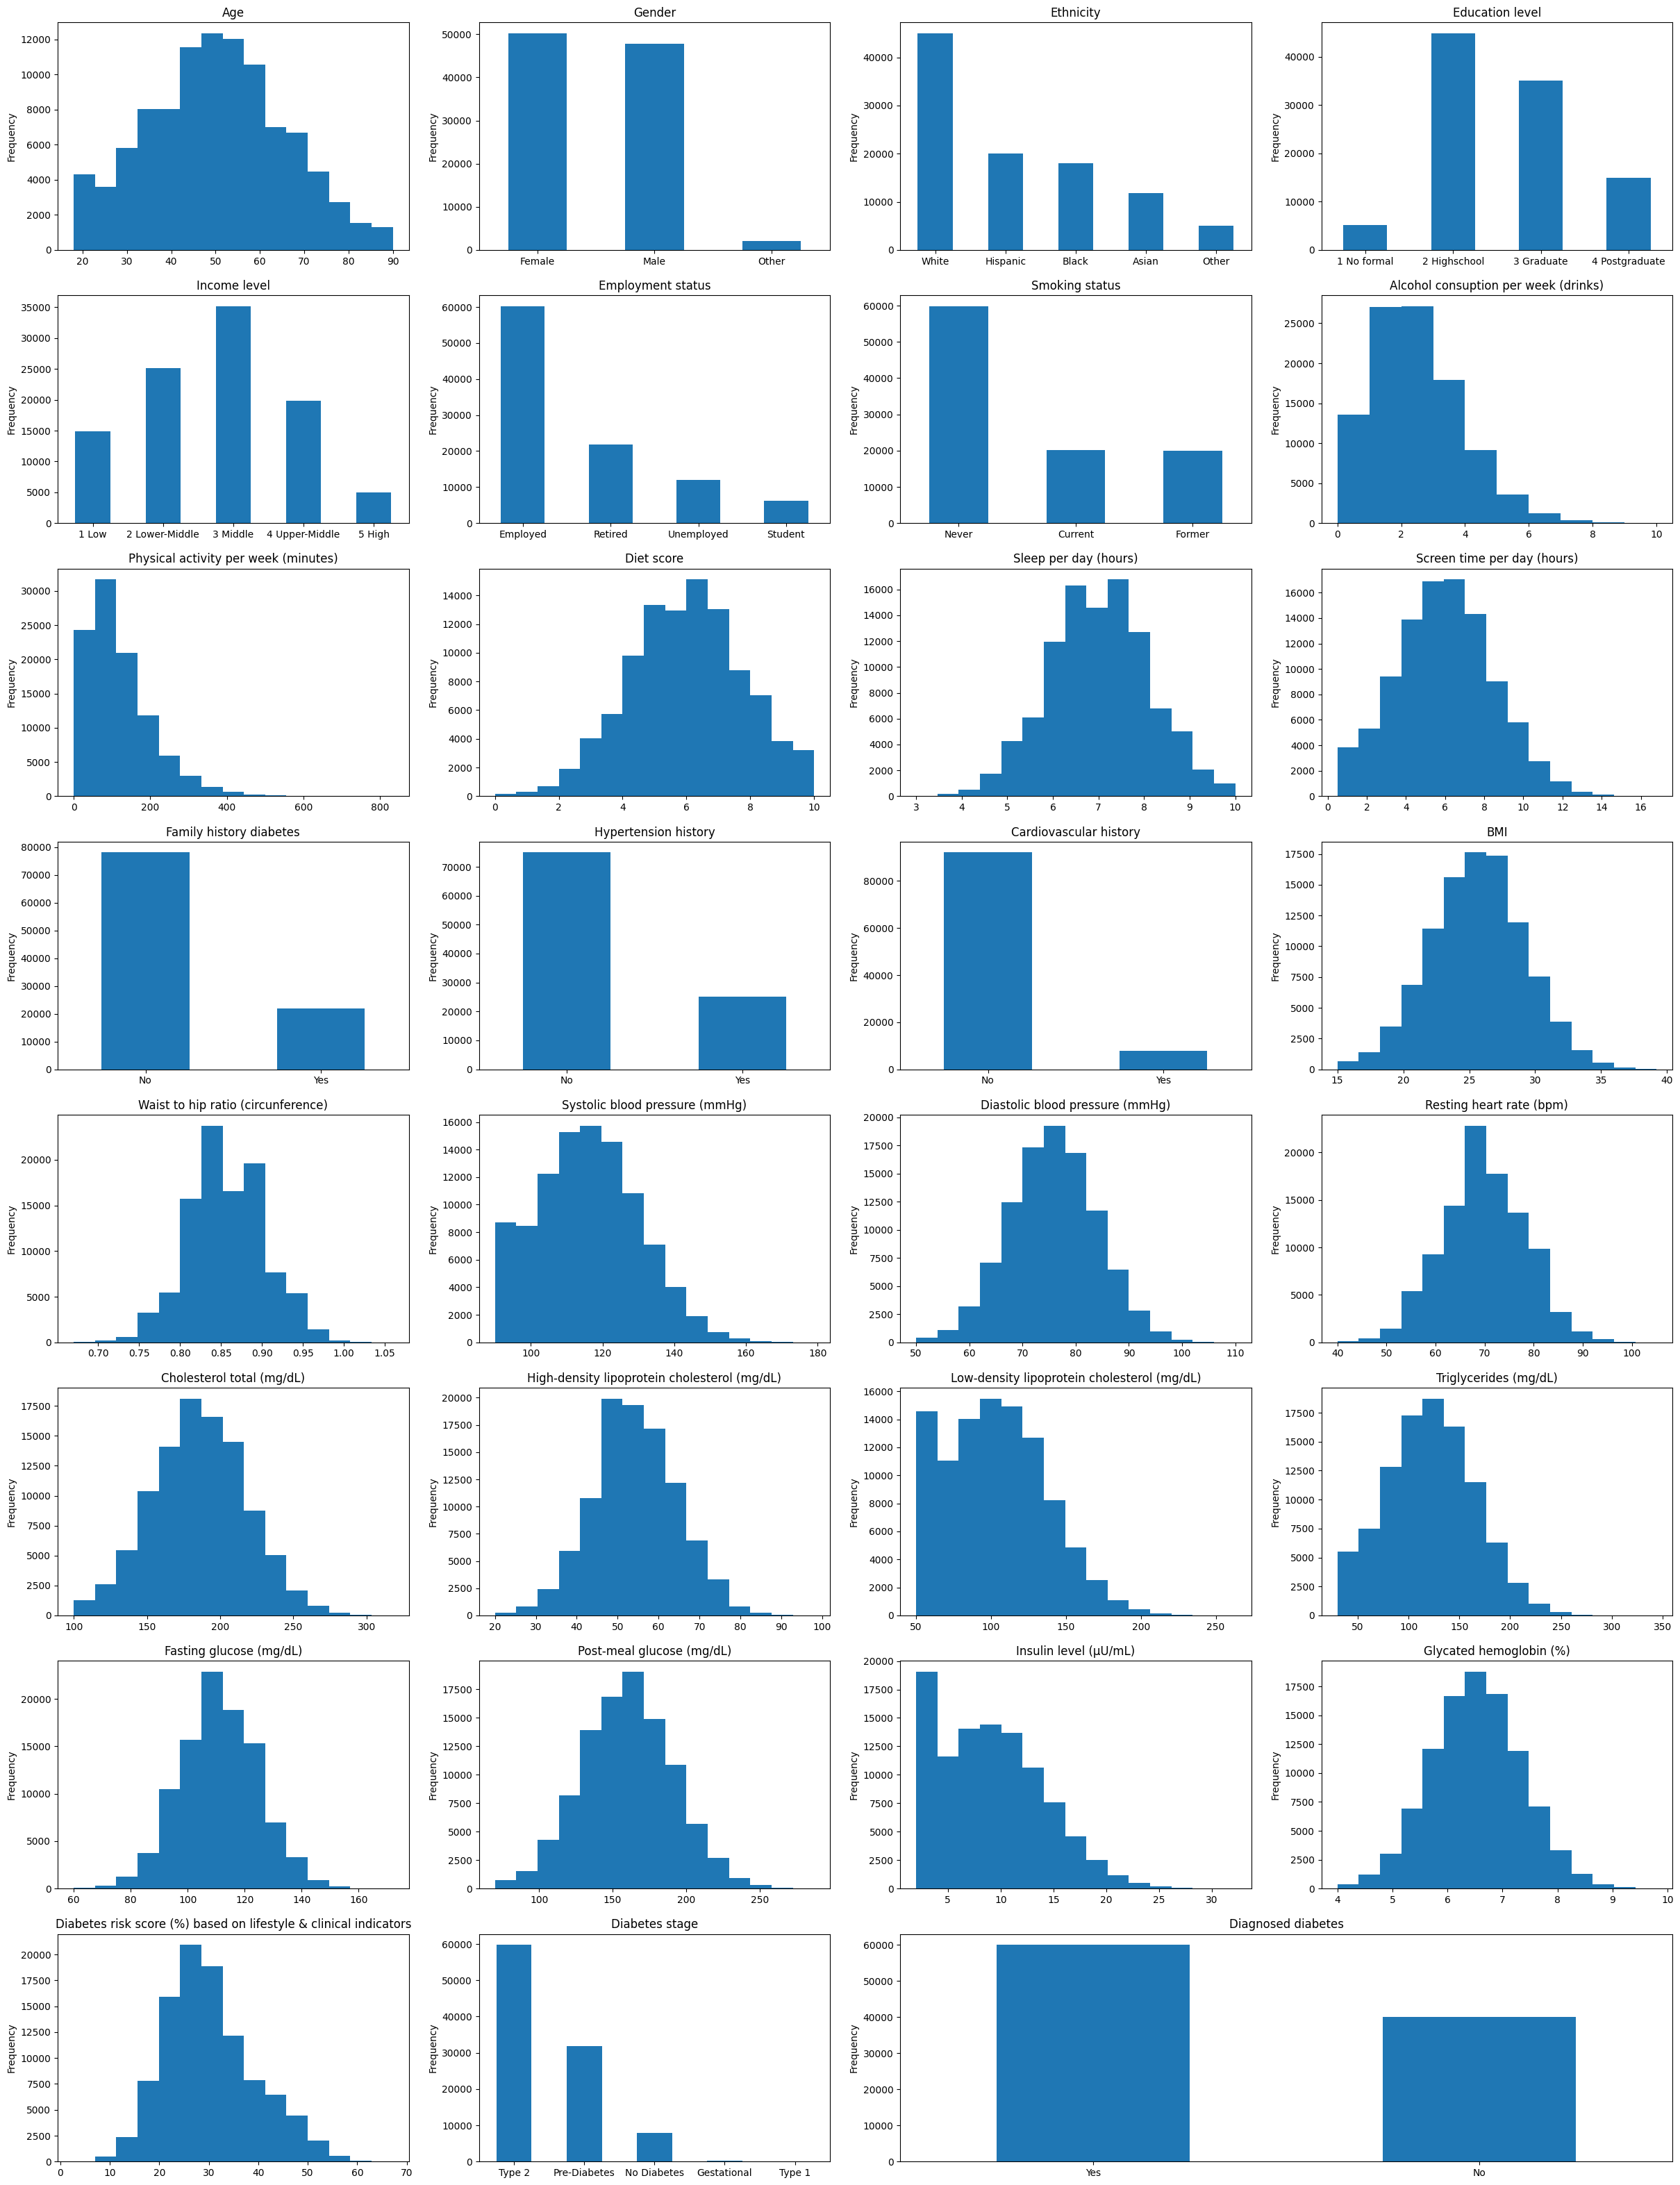

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,2.003670,118.911640,5.994787,6.997818,5.996468,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362
std,15.60460,1.417779,84.409662,1.780954,1.094622,2.468406,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505
min,18.00000,0.000000,0.000000,0.000000,3.000000,0.500000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000
25%,39.00000,1.000000,57.000000,4.800000,6.300000,4.300000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000
50%,50.00000,2.000000,100.000000,6.000000,7.000000,6.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000
75%,61.00000,3.000000,160.000000,7.200000,7.700000,7.700000,28.000000,0.890000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000
max,90.00000,10.000000,833.000000,10.000000,10.000000,16.800000,39.200000,1.060000,179.000000,110.00000,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000


In [154]:

lines = 8

fig = plt.figure(figsize=(30, lines*5))
grid = gridspec.GridSpec(lines, 4, figure=fig)

# 1° linha
ax = fig.add_subplot(grid[0, 0])
df['age'].plot.hist(ax=ax, bins=15)
ax.set_title('Age')

ax = fig.add_subplot(grid[0, 1])
df['gender'].value_counts().plot.bar(ax=ax)
ax.set_title('Gender')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[0, 2])
df['ethnicity'].value_counts().plot.bar(ax=ax)
ax.set_title('Ethnicity')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[0, 3])
df['education_level'].value_counts().sort_index().plot.bar(ax=ax)
ax.set_title('Education level')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[1, 0])
df['income_level'].value_counts().sort_index().plot.bar(ax=ax)
ax.set_title('Income level')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[1, 1])
df['employment_status'].value_counts().plot.bar(ax=ax)
ax.set_title('Employment status')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[1, 2])
df['smoking_status'].value_counts().plot.bar(ax=ax)
ax.set_title('Smoking status')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[1, 3])
df['alcohol_consumption_per_week'].plot.hist(ax=ax, bins=10)
ax.set_title('Alcohol consuption per week (drinks)')

ax = fig.add_subplot(grid[2, 0])
df['physical_activity_minutes_per_week'].plot.hist(ax=ax, bins=15)
ax.set_title('Physical activity per week (minutes)')

ax = fig.add_subplot(grid[2, 1])
df['diet_score'].plot.hist(ax=ax, bins=15)
ax.set_title('Diet score')

ax = fig.add_subplot(grid[2, 2])
df['sleep_hours_per_day'].plot.hist(ax=ax, bins=15)
ax.set_title('Sleep per day (hours)')

ax = fig.add_subplot(grid[2, 3])
df['screen_time_hours_per_day'].plot.hist(ax=ax, bins=15)
ax.set_title('Screen time per day (hours)')

ax = fig.add_subplot(grid[3, 0])
df['family_history_diabetes'].value_counts().plot.bar(ax=ax)
ax.set_title('Family history diabetes')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[3, 1])
df['hypertension_history'].value_counts().plot.bar(ax=ax)
ax.set_title('Hypertension history')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[3, 2])
df['cardiovascular_history'].value_counts().plot.bar(ax=ax)
ax.set_title('Cardiovascular history')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[3, 3])
df['bmi'].plot.hist(ax=ax, bins=15)
ax.set_title('BMI')

ax = fig.add_subplot(grid[4, 0])
df['waist_to_hip_ratio'].plot.hist(ax=ax, bins=15)
ax.set_title('Waist to hip ratio (circunference)')

ax = fig.add_subplot(grid[4, 1])
df['systolic_bp'].plot.hist(ax=ax, bins=15)
ax.set_title('Systolic blood pressure (mmHg)') # fase de contração do coração -> pressão mais alta do que a fase diastolic

ax = fig.add_subplot(grid[4, 2])
df['diastolic_bp'].plot.hist(ax=ax, bins=15)
ax.set_title('Diastolic blood pressure (mmHg)') # relaxamento do coração -> pressão mais baixa do que a fase systolic

ax = fig.add_subplot(grid[4, 3])
df['heart_rate'].plot.hist(ax=ax, bins=15)
ax.set_title('Resting heart rate (bpm)')

ax = fig.add_subplot(grid[5, 0])
df['cholesterol_total'].plot.hist(ax=ax, bins=15)
ax.set_title('Cholesterol total (mg/dL)')

ax = fig.add_subplot(grid[5, 1])
df['hdl_cholesterol'].plot.hist(ax=ax, bins=15)
ax.set_title('High-density lipoprotein cholesterol (mg/dL)')

ax = fig.add_subplot(grid[5, 2])
df['ldl_cholesterol'].plot.hist(ax=ax, bins=15)
ax.set_title('Low-density lipoprotein cholesterol (mg/dL)')

ax = fig.add_subplot(grid[5, 3])
df['triglycerides'].plot.hist(ax=ax, bins=15)
ax.set_title('Triglycerides (mg/dL)')

ax = fig.add_subplot(grid[6, 0])
df['glucose_fasting'].plot.hist(ax=ax, bins=15)
ax.set_title('Fasting glucose (mg/dL)')

ax = fig.add_subplot(grid[6, 1])
df['glucose_postprandial'].plot.hist(ax=ax, bins=15)
ax.set_title('Post-meal glucose (mg/dL)')

ax = fig.add_subplot(grid[6, 2])
df['insulin_level'].plot.hist(ax=ax, bins=15)
ax.set_title('Insulin level (µU/mL)')

ax = fig.add_subplot(grid[6, 3])
df['hba1c'].plot.hist(ax=ax, bins=15)
ax.set_title('Glycated hemoglobin (%)')

ax = fig.add_subplot(grid[7, 0])
df['diabetes_risk_score'].plot.hist(ax=ax, bins=15)
ax.set_title('Diabetes risk score (%) based on lifestyle & clinical indicators')

ax = fig.add_subplot(grid[7, 1])
df['diabetes_stage'].value_counts().plot.bar(ax=ax)
ax.set_title('Diabetes stage')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

ax = fig.add_subplot(grid[7, 2:])
df['diagnosed_diabetes'].value_counts().plot.bar(ax=ax)
ax.set_title('Diagnosed diabetes')
ax.set_xlabel(None)
ax.set_ylabel('Frequency')
ax.tick_params(axis='x', rotation=0)

plt.show()

display(df.describe())

**Observações:**

Distribuições balanceadas no geral. <br>
'Glycated hemoglobin' é o marcador diagnostico para Diabetes, muito provavelemente é uma ótima preditora. Se ela sozinha for capaz de classificar corretamente Diabetes então não trabalharemos com ela, pois podemos ver ela seja uma "vazadora" da target. <br>
'Diabetes stage' é uma variavel target e será removida da analise pois só trabalharemos com a target 'Diagnosed diabetes' <br>

In [155]:
df = df.drop('diabetes_stage', axis=1)

#### *Bivariate* Analysis ~ versus *diagnosed_diabetes*

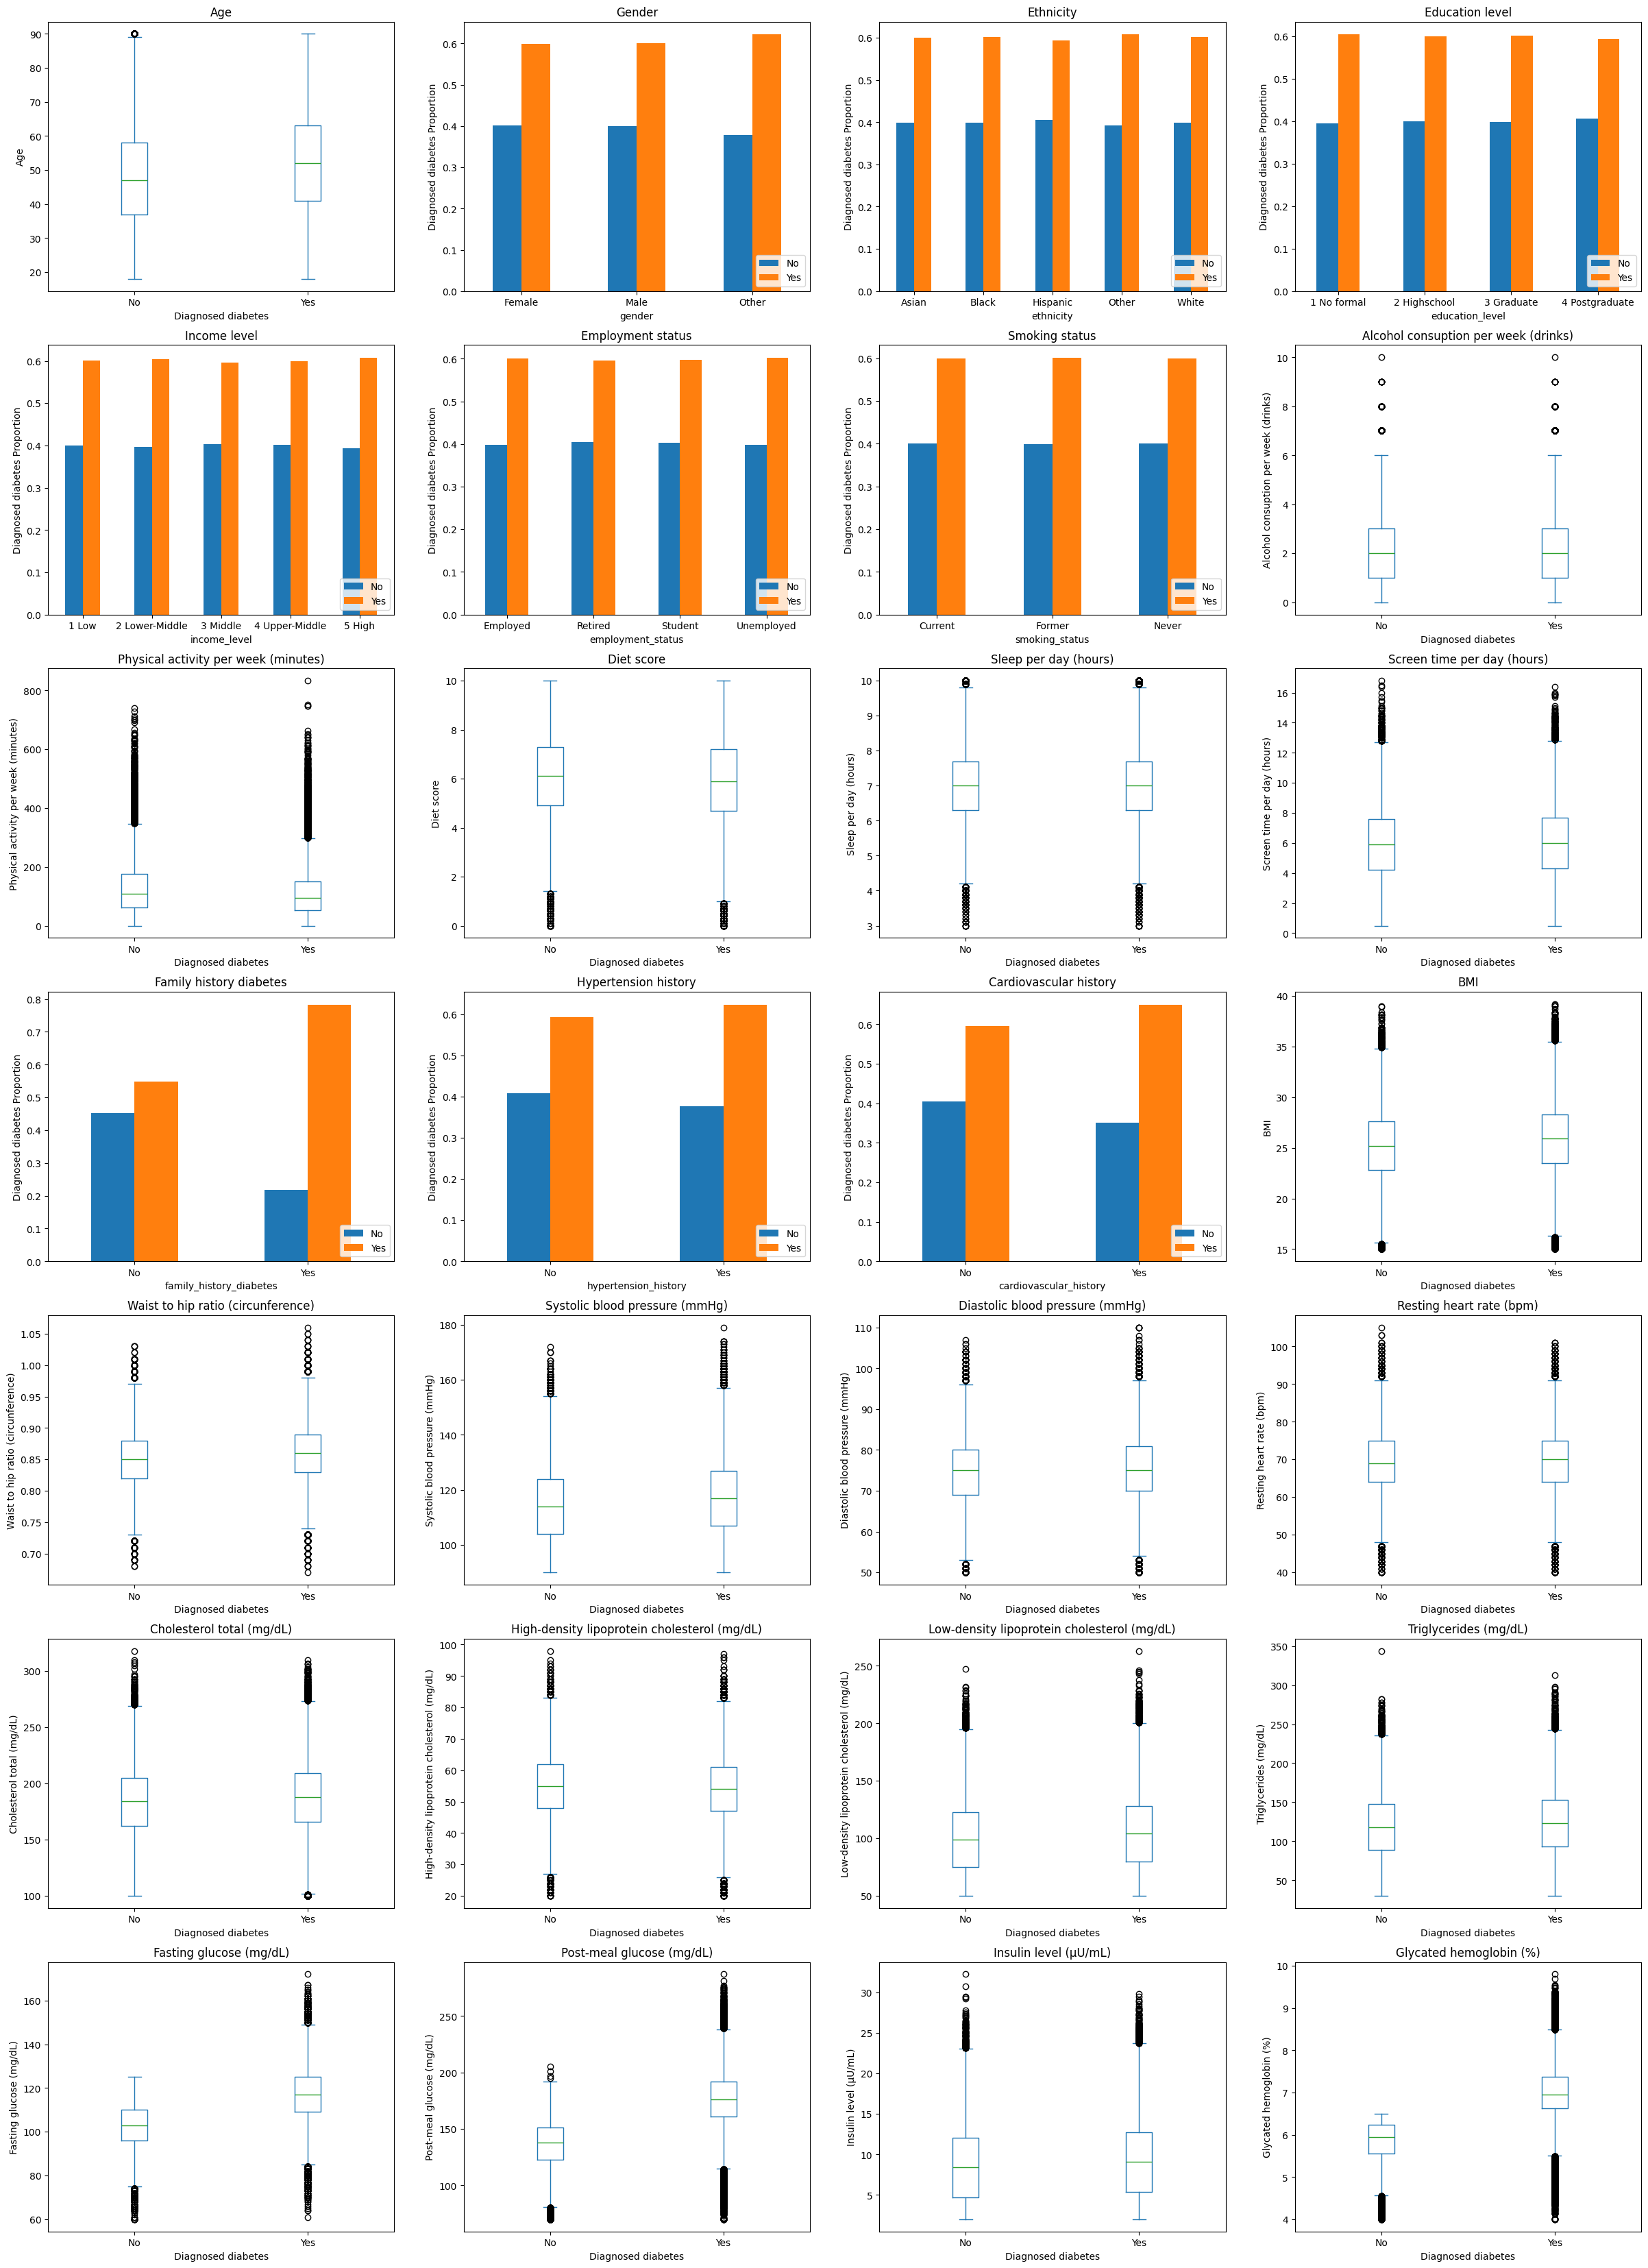

In [156]:

fig = plt.figure(figsize=(30, lines*6))
grid = gridspec.GridSpec(lines, 4, figure=fig)

ax = fig.add_subplot(grid[0, 0])
df[['age','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Age')
ax.set_ylabel('Age')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[0, 1])
df_ = df.groupby('gender')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='gender', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Gender')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[0, 2])
df_ = df.groupby('ethnicity')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='ethnicity', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Ethnicity')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[0, 3])
df_ = df.groupby('education_level')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='education_level', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Education level')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[1, 0])
df_ = df.groupby('income_level')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='income_level', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Income level')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[1, 1])
df_ = df.groupby('employment_status')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='employment_status', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Employment status')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[1, 2])
df_ = df.groupby('smoking_status')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='smoking_status', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Smoking status')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[1, 3])
df[['alcohol_consumption_per_week','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Alcohol consuption per week (drinks)')
ax.set_ylabel('Alcohol consuption per week (drinks)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[2, 0])
df[['physical_activity_minutes_per_week','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Physical activity per week (minutes)')
ax.set_ylabel('Physical activity per week (minutes)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[2, 1])
df[['diet_score','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Diet score')
ax.set_ylabel('Diet score')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[2, 2])
df[['sleep_hours_per_day','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Sleep per day (hours)')
ax.set_ylabel('Sleep per day (hours)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[2, 3])
df[['screen_time_hours_per_day','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Screen time per day (hours)')
ax.set_ylabel('Screen time per day (hours)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[3, 0])
df_ = df.groupby('family_history_diabetes')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='family_history_diabetes', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Family history diabetes')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[3, 1])
df_ = df.groupby('hypertension_history')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='hypertension_history', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Hypertension history')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[3, 2])
df_ = df.groupby('cardiovascular_history')['diagnosed_diabetes'].value_counts(normalize=True).reset_index()
df_.pivot_table(index='cardiovascular_history', columns='diagnosed_diabetes', values='proportion').plot.bar(rot=0, ax=ax)
ax.set_title('Cardiovascular history')
ax.set_ylabel('Diagnosed diabetes Proportion')
ax.legend(loc='lower right')

ax = fig.add_subplot(grid[3, 3])
df[['bmi','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('BMI')
ax.set_ylabel('BMI')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[4, 0])
df[['waist_to_hip_ratio','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Waist to hip ratio (circunference)')
ax.set_ylabel('Waist to hip ratio (circunference)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[4, 1])
df[['systolic_bp','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Systolic blood pressure (mmHg)')
ax.set_ylabel('Systolic blood pressure (mmHg)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[4, 2])
df[['diastolic_bp','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Diastolic blood pressure (mmHg)')
ax.set_ylabel('Diastolic blood pressure (mmHg)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[4, 3])
df[['heart_rate','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Resting heart rate (bpm)')
ax.set_ylabel('Resting heart rate (bpm)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[5, 0])
df[['cholesterol_total','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Cholesterol total (mg/dL)')
ax.set_ylabel('Cholesterol total (mg/dL)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[5, 1])
df[['hdl_cholesterol','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('High-density lipoprotein cholesterol (mg/dL)')
ax.set_ylabel('High-density lipoprotein cholesterol (mg/dL)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[5, 2])
df[['ldl_cholesterol','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Low-density lipoprotein cholesterol (mg/dL)')
ax.set_ylabel('Low-density lipoprotein cholesterol (mg/dL)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[5, 3])
df[['triglycerides','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Triglycerides (mg/dL)')
ax.set_ylabel('Triglycerides (mg/dL)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[6, 0])
df[['glucose_fasting','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Fasting glucose (mg/dL)')
ax.set_ylabel('Fasting glucose (mg/dL)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[6, 1])
df[['glucose_postprandial','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Post-meal glucose (mg/dL)')
ax.set_ylabel('Post-meal glucose (mg/dL)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[6, 2])
df[['insulin_level','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Insulin level (µU/mL)')
ax.set_ylabel('Insulin level (µU/mL)')
ax.set_xlabel('Diagnosed diabetes')

ax = fig.add_subplot(grid[6, 3])
df[['hba1c','diagnosed_diabetes']].plot.box(by='diagnosed_diabetes', ax=ax)
ax.set_title('Glycated hemoglobin (%)')
ax.set_ylabel('Glycated hemoglobin (%)')
ax.set_xlabel('Diagnosed diabetes')

plt.show()

**Observações.:** 

'Glycated hemoglobin' não é regra exata para classifação de Diabete, logo ela não vaza a target, continuaremos com ela como feature. <br>

In [157]:
df.columns

Index(['age', 'gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c', 'diabetes_risk_score',
       'diagnosed_diabetes'],
      dtype='object')

In [207]:
# Testes de hipoteses
a = .05

print()
print('-- age')
display(df.groupby('diagnosed_diabetes')['age'].mean())
# teste de hip para variancia (2) ~ h0: variancias iguais, ha: variancias diferentes
x1, x2 = df[df['diagnosed_diabetes']=='Yes']['age'], df[df['diagnosed_diabetes']=='No']['age']
stat = np.var(x1, ddof=1)/np.var(x2, ddof=1)
df1, df2 = len(x1) - 1, len(x2) - 1
p = 2*min(f.cdf(stat, df1, df2), 1-f.cdf(stat, df1, df2))
print(f'p-value: {p}')
if p <= a: print(f'- existe evidencias suficientes a {1-a} de confiança para rejeitar h0, portanto: variancias diferentes.')
else: print(f'- não existe evidencias suficientes a {1-a} de confiança para rejeitar h0, portanto: variancias iguais.')
# teste de hip para media (2), var diferentes ~ h0: variancias iguais, ha: variancias diferentes
stat, p = ttest_ind(x1, x2, equal_var=False)
print(f'p-value: {p}')
if p <= a: print(f'- existe evidencias suficientes a {1-a} de confiança para rejeitar h0, portanto: medias diferentes.')
else: print(f'- não existe evidencias suficientes a {1-a} de confiança para rejeitar h0, portanto: medias iguais.')

print()
print('-- gender')
df_ = pd.crosstab(df['gender'], df['diagnosed_diabetes'])
display(pd.crosstab(df['gender'], df['diagnosed_diabetes']))
# teste de hip para categorias (2) ~ h0: categorias não dependentes, ha: categorias dependentes
stats, p, _, _ = chi2_contingency(df_)
print(stats, p)
print(f'p-value: {p}')
if p <= a: print(f'- existe evidencias suficientes a {1-a} de confiança para rejeitar h0, portanto: categorias dependentes.')
else: print(f'- não existe evidencias suficientes a {1-a} de confiança para rejeitar h0, portanto: categorias não dependentes.')


-- age


diagnosed_diabetes
No     47.488601
Yes    51.875096
Name: age, dtype: float64

p-value: 0.0027146781155442667
- existe evidencias suficientes a 0.95 de confiança para rejeitar h0, portanto: variancias diferentes.
p-value: 0.0
- existe evidencias suficientes a 0.95 de confiança para rejeitar h0, portanto: medias diferentes.

-- gender


diagnosed_diabetes,No,Yes
gender,,
Female,20164,30052
Male,19077,28694
Other,761,1252


4.6292067375610335 0.09880536552392974
p-value: 0.09880536552392974
- não existe evidencias suficientes a 0.95 de confiança para rejeitar h0, portanto: categorias não dependentes.
